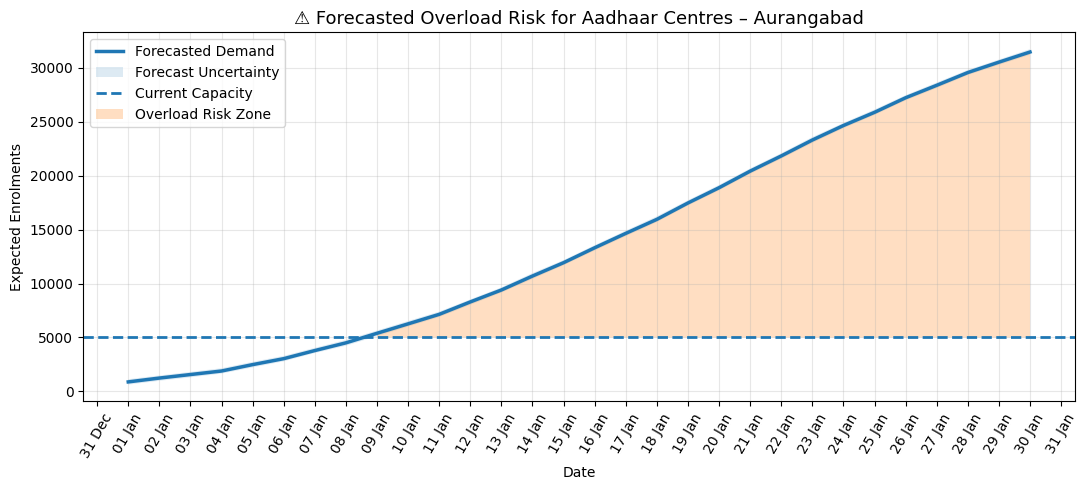

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("../data/processed/forecasts/district_demand_forecast.csv")

# Pick one district (Agra)
CAPACITY = 5000

# Compute excess demand
df["excess"] = df["yhat"] - CAPACITY

# Find most vulnerable district (highest average excess)
most_vulnerable = (
    df.groupby("district")["excess"]
      .mean()
      .idxmax()
)

district = most_vulnerable
sample = df[df["district"] == district]

plt.figure(figsize=(11, 5))

# Predicted demand
plt.plot(
    sample["ds"],
    sample["yhat"],
    linewidth=2.5,
    label="Forecasted Demand"
)

# Uncertainty band (lighter, less dominant)
plt.fill_between(
    sample["ds"],
    sample["yhat_lower"],
    sample["yhat_upper"],
    alpha=0.15,
    label="Forecast Uncertainty"
)

# Capacity threshold
plt.axhline(
    CAPACITY,
    linestyle="--",
    linewidth=2,
    label="Current Capacity"
)

# Highlight overload region
plt.fill_between(
    sample["ds"],
    CAPACITY,
    sample["yhat"],
    where=(sample["yhat"] > CAPACITY),
    alpha=0.25,
    label="Overload Risk Zone"
)

# Formatting dates (CRITICAL FIX)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.xticks(rotation=60)

plt.title(f"⚠ Forecasted Overload Risk for Aadhaar Centres – {district}", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Expected Enrolments")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

df = pd.read_csv("../data/processed/forecasts/district_demand_forecast.csv")

CAPACITY = 5000

# Calculate average overload per district
risk_summary = (
    df.assign(overload=df["yhat"] - CAPACITY)
      .groupby("district", as_index=False)["overload"]
      .mean()
)

# Keep only districts where demand exceeds capacity
risk_summary = risk_summary[risk_summary["overload"] > 0]

# Get top 5 most vulnerable districts
top5 = risk_summary.sort_values("overload", ascending=False).head(5)

top5


,district,overload
42,Aurangabad,9066.183370
2,Agra,8217.622801
11,Aligarh,5262.209820
4,Ahmadnagar,3756.151982
45,Azamgarh,3715.635087


In [8]:
def risk_color(overload):
    if overload > 15000:
        return "red"      # Highest risk
    elif overload > 7000:
        return "orange"   # Medium risk
    else:
        return "gold"     # Emerging risk

top5["color"] = top5["overload"].apply(risk_color)
top5


,district,overload,color
42,Aurangabad,9066.183370,orange
2,Agra,8217.622801,orange
11,Aligarh,5262.209820,gold
4,Ahmadnagar,3756.151982,gold
45,Azamgarh,3715.635087,gold


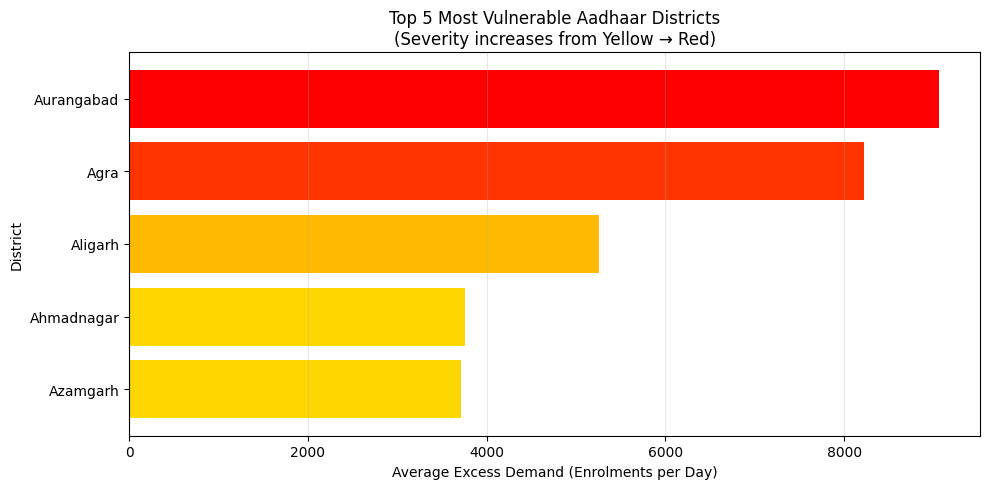

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list(
    "risk_gradient",
    ["gold", "orange", "red"]
)

# Normalize overload values for color mapping
norm = mcolors.Normalize(
    vmin=top5["overload"].min(),
    vmax=top5["overload"].max()
)

colors = cmap(norm(top5["overload"]))

# Plot
plt.figure(figsize=(10, 5))

plt.barh(
    top5["district"],
    top5["overload"],
    color=colors
)

plt.xlabel("Average Excess Demand (Enrolments per Day)")
plt.ylabel("District")

plt.title(
    "Top 5 Most Vulnerable Aadhaar Districts\n"
    "(Severity increases from Yellow → Red)"
)

plt.gca().invert_yaxis()  # Highest risk on top
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


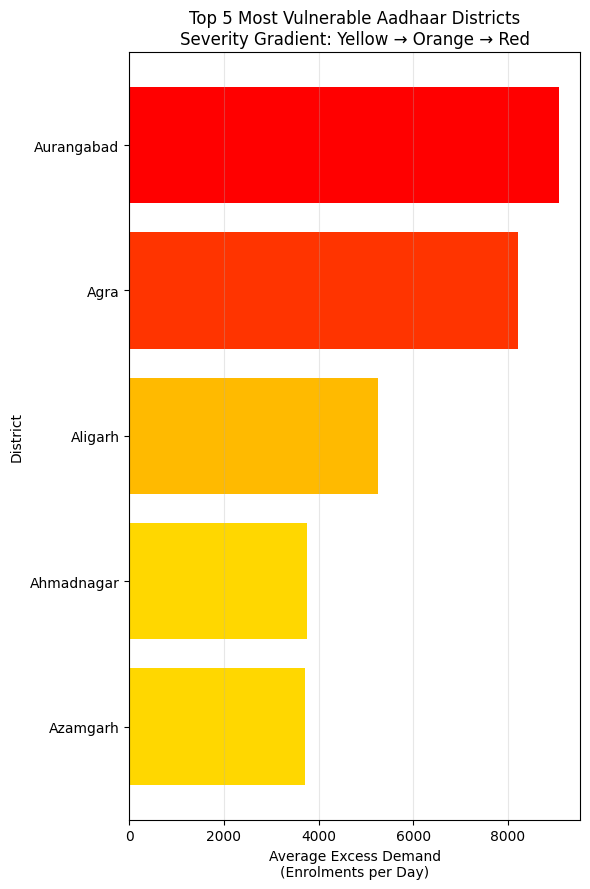

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create gradient colormap (yellow → orange → red)
cmap = mcolors.LinearSegmentedColormap.from_list(
    "risk_gradient",
    ["gold", "orange", "red"]
)

# Normalize overload values
norm = mcolors.Normalize(
    vmin=top5["overload"].min(),
    vmax=top5["overload"].max()
)

colors = cmap(norm(top5["overload"]))

# -------- Portrait layout --------
plt.figure(figsize=(6, 9))  # Tall layout

plt.barh(
    top5["district"],
    top5["overload"],
    color=colors
)

plt.xlabel("Average Excess Demand\n(Enrolments per Day)")
plt.ylabel("District")

plt.title(
    "Top 5 Most Vulnerable Aadhaar Districts\n"
    "Severity Gradient: Yellow → Orange → Red",
    fontsize=12
)

plt.gca().invert_yaxis()  # Highest risk on top
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()
